In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#Loading Source Data File
file_path = '../../Source Data File.xlsx'
sheet_name = 'Figure 2D-4B-4C-5B-S3-S6B'
df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
chance_level = [100/6, 100/4]

def extracting_array_from_excel(df, row):
    results = np.array([el for el in df.iloc[row] if el not in ['Enc', 'Thr', 'Double', 'SNN', 'SVM', 'MLP', 'imEMG', 'ENG', 'imEMG+ENG']])
    # Remove NaN values
    return results[~np.isnan(results)]

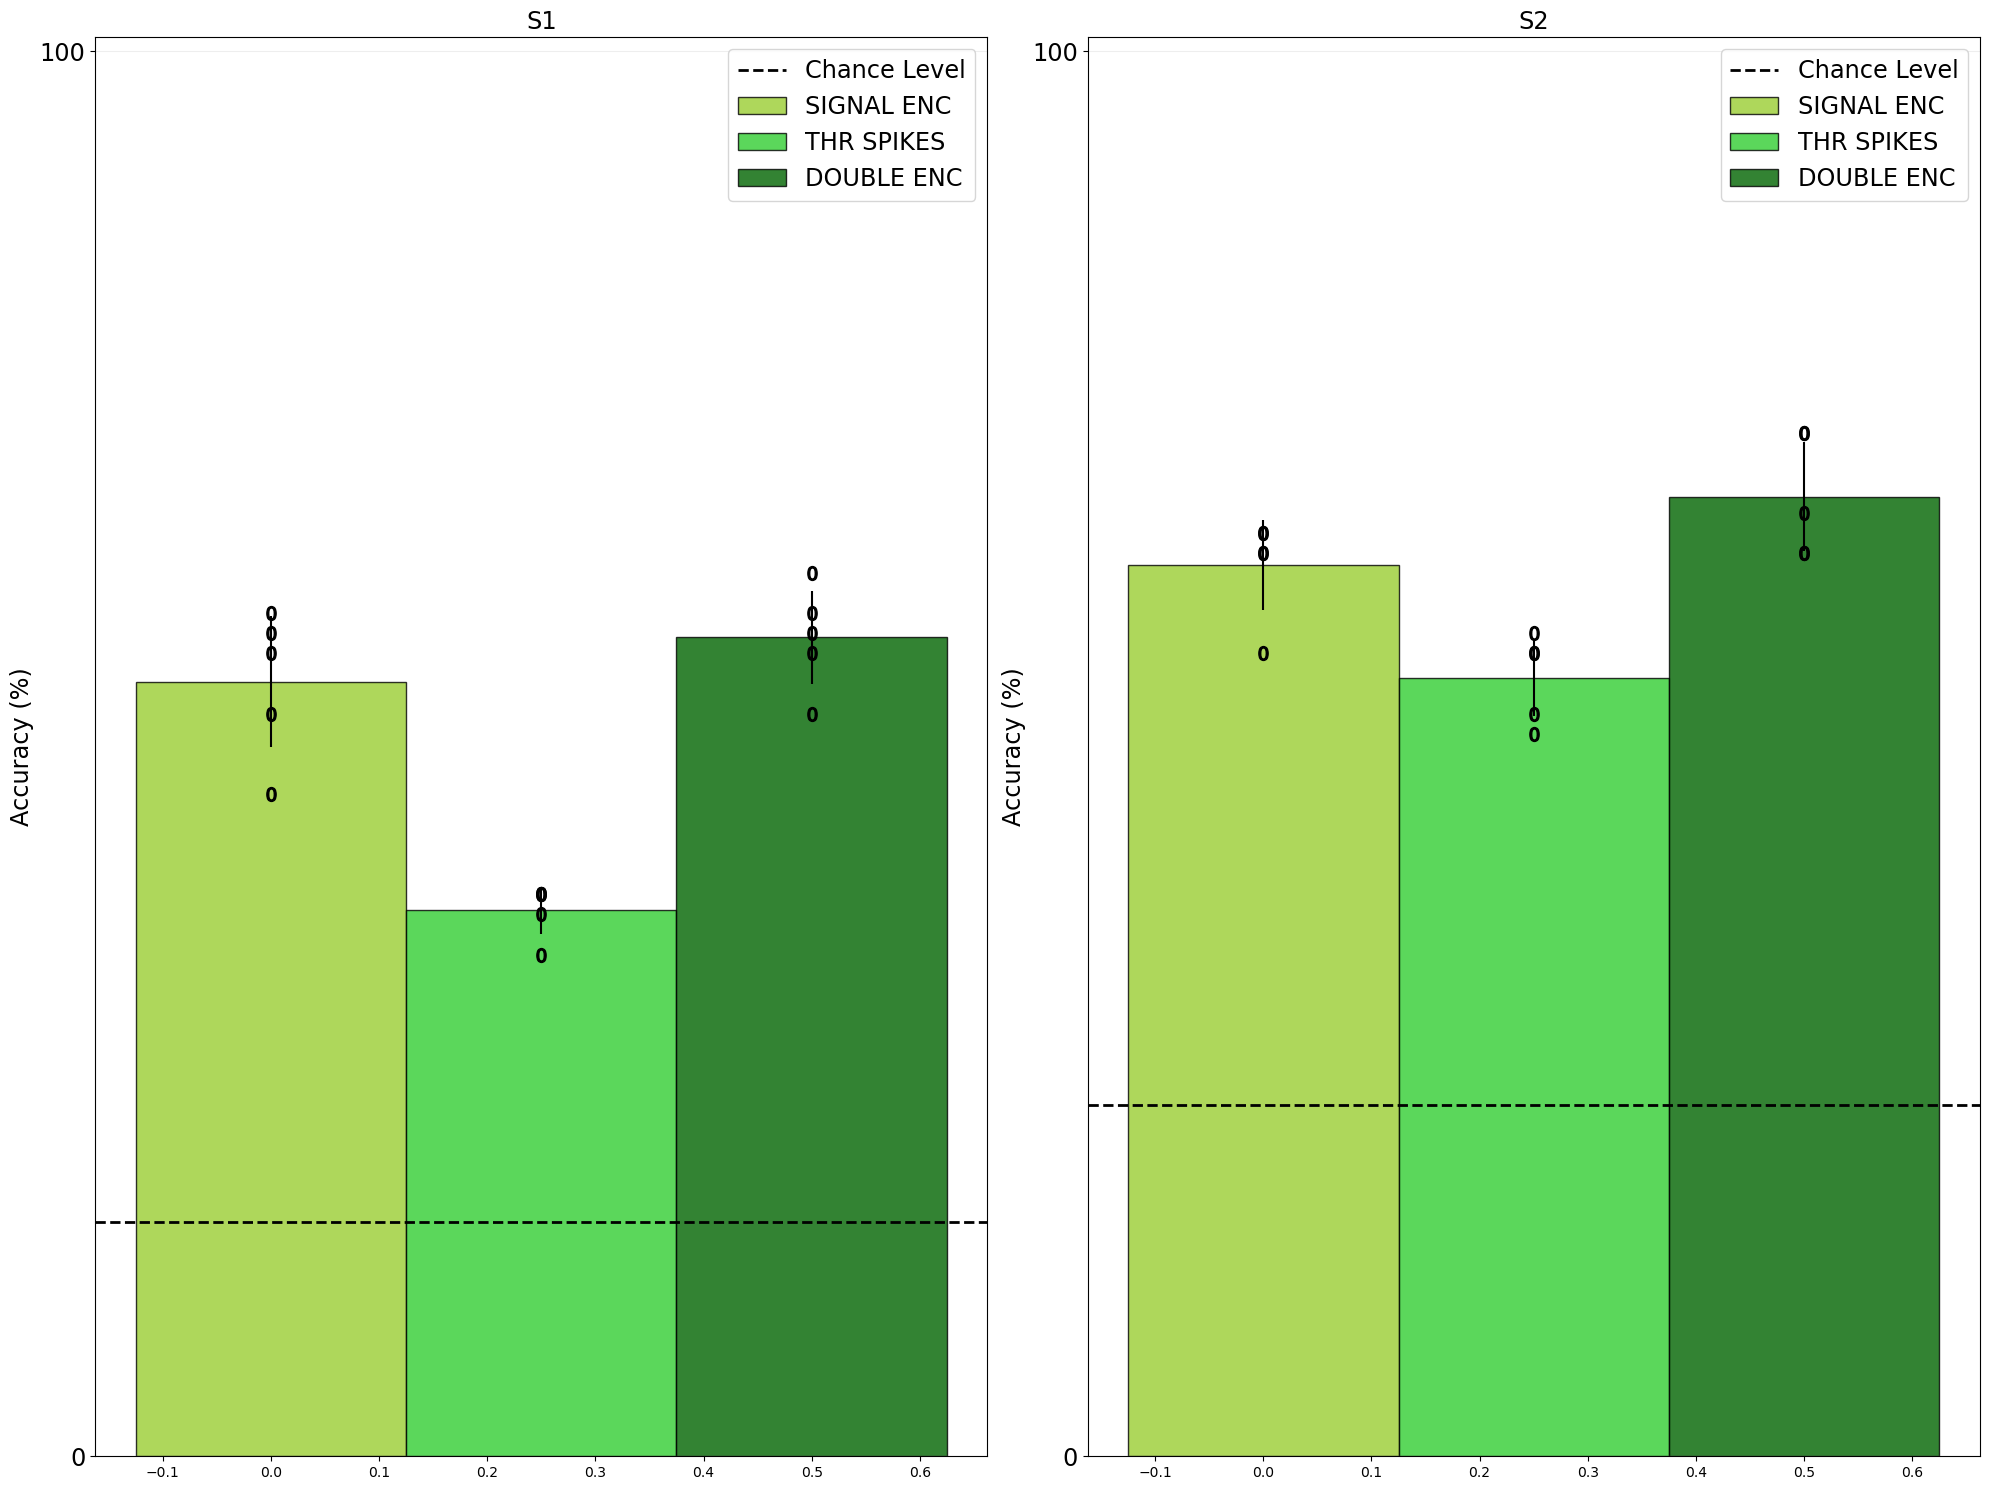

In [40]:
#FIGURE 4B
results_lif_encoding_S1 = extracting_array_from_excel(df, 10)
results_threshold_encoding_S1 = extracting_array_from_excel(df, 11)
results_double_encoding_S1 = extracting_array_from_excel(df, 12)
results_lif_encoding_S2 = extracting_array_from_excel(df, 14)
results_threshold_encoding_S2 = extracting_array_from_excel(df, 15)
results_double_encoding_S2 = extracting_array_from_excel(df, 16)

results_lif_encoding = np.array([results_lif_encoding_S1, results_lif_encoding_S2]) * 100
results_threshold_encoding = np.array([results_threshold_encoding_S1, results_threshold_encoding_S2]) * 100
results_double_encoding = np.array([results_double_encoding_S1, results_double_encoding_S2]) * 100

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
for i in range(2):
    index = np.arange(1) 
    bars_width = 0.25
    opacity = 0.8

    rects_lif = ax[i].bar(index, [np.mean(results_lif_encoding[i])], bars_width, yerr = [np.std(results_lif_encoding[i])], alpha = opacity, label = 'SIGNAL ENC', edgecolor='black', color='yellowgreen')
    rects_thr = ax[i].bar(index+bars_width, [np.mean(results_threshold_encoding[i])], bars_width, yerr = [np.std(results_threshold_encoding[i])], alpha = opacity, label = 'THR SPIKES',edgecolor='black', color='limegreen')
    rects_double = ax[i].bar(index+2*bars_width, [np.mean(results_double_encoding[i])], bars_width, yerr = [np.std(results_double_encoding[i])], alpha = opacity, label = 'DOUBLE ENC',edgecolor='black', color='darkgreen')

    ax[i].scatter(index*np.ones(5), results_lif_encoding[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), results_threshold_encoding[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), results_double_encoding[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,100],[0,100], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    #plt.xticks(index+1/2*bars_width, ('Encoding', 'Threshold Spikes', 'Both (Enc + Thr Spikes)'), fontsize='xx-large')
    ax[i].legend(loc='upper right', fontsize='xx-large')

plt.tight_layout()
#plt.savefig('FIGURE 4B')
#plt.savefig('FIGURE 4B.svg', format='svg')
plt.show()

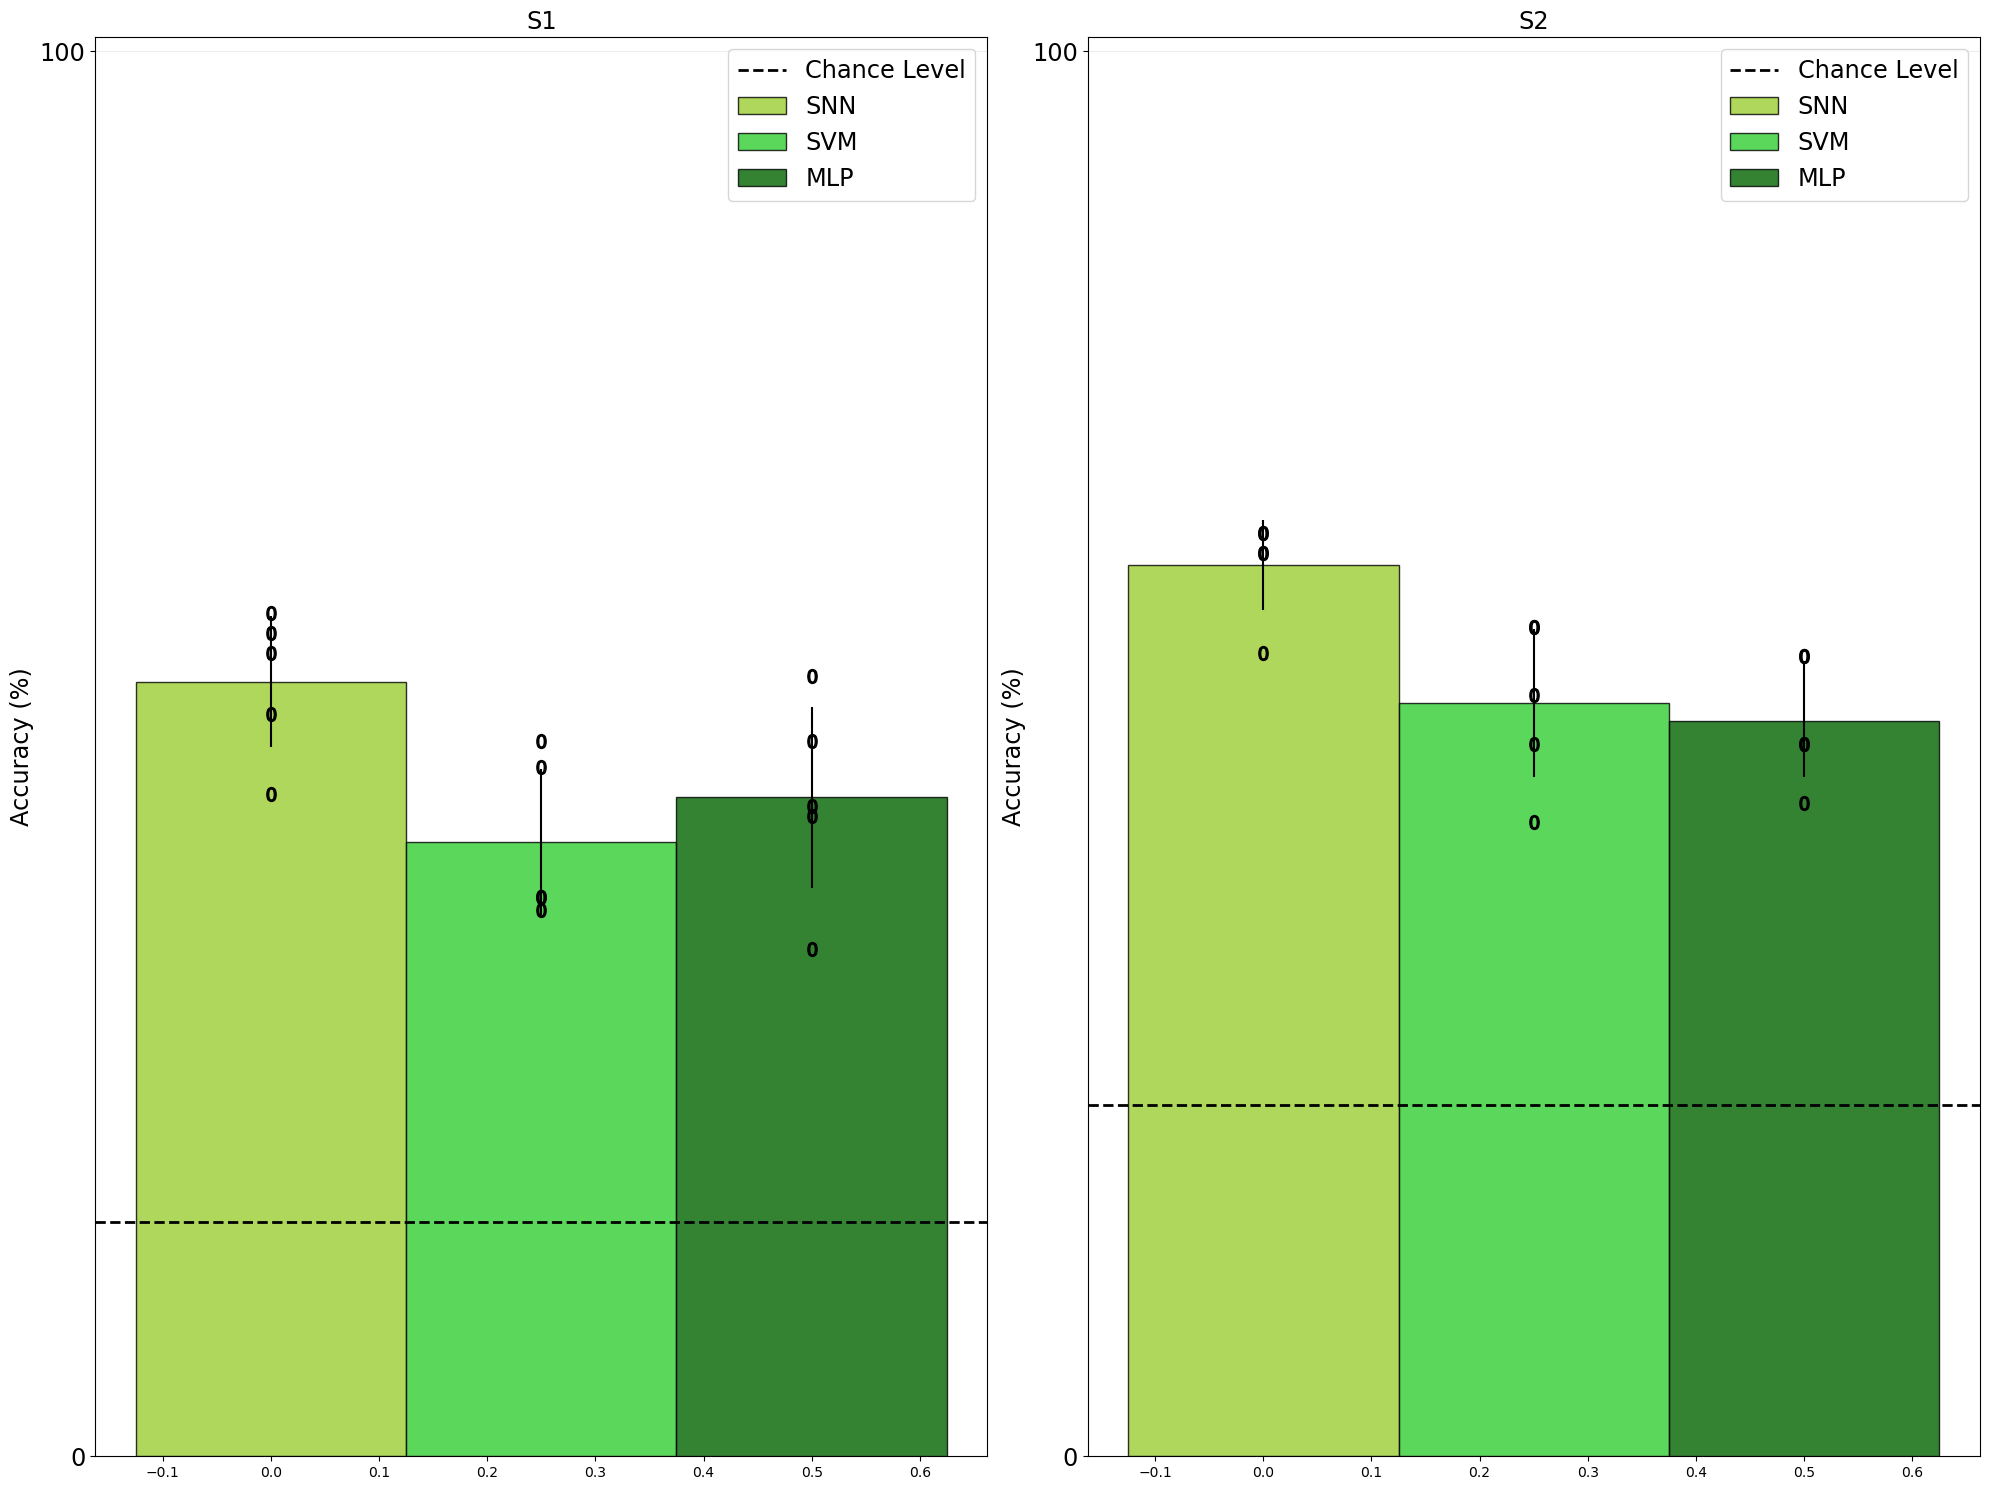

In [41]:
#FIGURE 4C 
results_snn_S1 = extracting_array_from_excel(df, 20)
results_svm_S1 = extracting_array_from_excel(df, 21)
results_mlp_S1 = extracting_array_from_excel(df, 22)
results_snn_S2 = extracting_array_from_excel(df, 24)
results_svm_S2 = extracting_array_from_excel(df, 25)
results_mlp_S2 = extracting_array_from_excel(df, 26)

results_snn = np.array([results_snn_S1, results_snn_S2]) * 100
results_svm = np.array([results_svm_S1, results_svm_S2]) * 100
results_mlp = np.array([results_mlp_S1, results_mlp_S2]) * 100


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
for i in range(2):
    index = np.arange(1) 
    bars_width = 0.25
    opacity = 0.8

    rects_snn = ax[i].bar(index, [np.mean(results_snn[i])], bars_width, yerr = [np.std(results_snn[i])], alpha = opacity, label = 'SNN', edgecolor='black', color='yellowgreen')
    rects_svm = ax[i].bar(index+bars_width, [np.mean(results_svm[i])], bars_width, yerr = [np.std(results_svm[i])], alpha = opacity, label = 'SVM',edgecolor='black', color='limegreen')
    rects_mlp = ax[i].bar(index+2*bars_width, [np.mean(results_mlp[i])], bars_width, yerr = [np.std(results_mlp[i])], alpha = opacity, label = 'MLP',edgecolor='black', color='darkgreen')

    ax[i].scatter(index*np.ones(5), results_snn[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), results_svm[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), results_mlp[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,100],[0,100], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    #plt.xticks(index+1/2*bars_width, ('Encoding', 'Threshold Spikes', 'Both (Enc + Thr Spikes)'), fontsize='xx-large')
    ax[i].legend(loc='upper right', fontsize='xx-large')

plt.tight_layout()
#plt.savefig('FIGURE 4B')
#plt.savefig('FIGURE 4B.svg', format='svg')
plt.show()

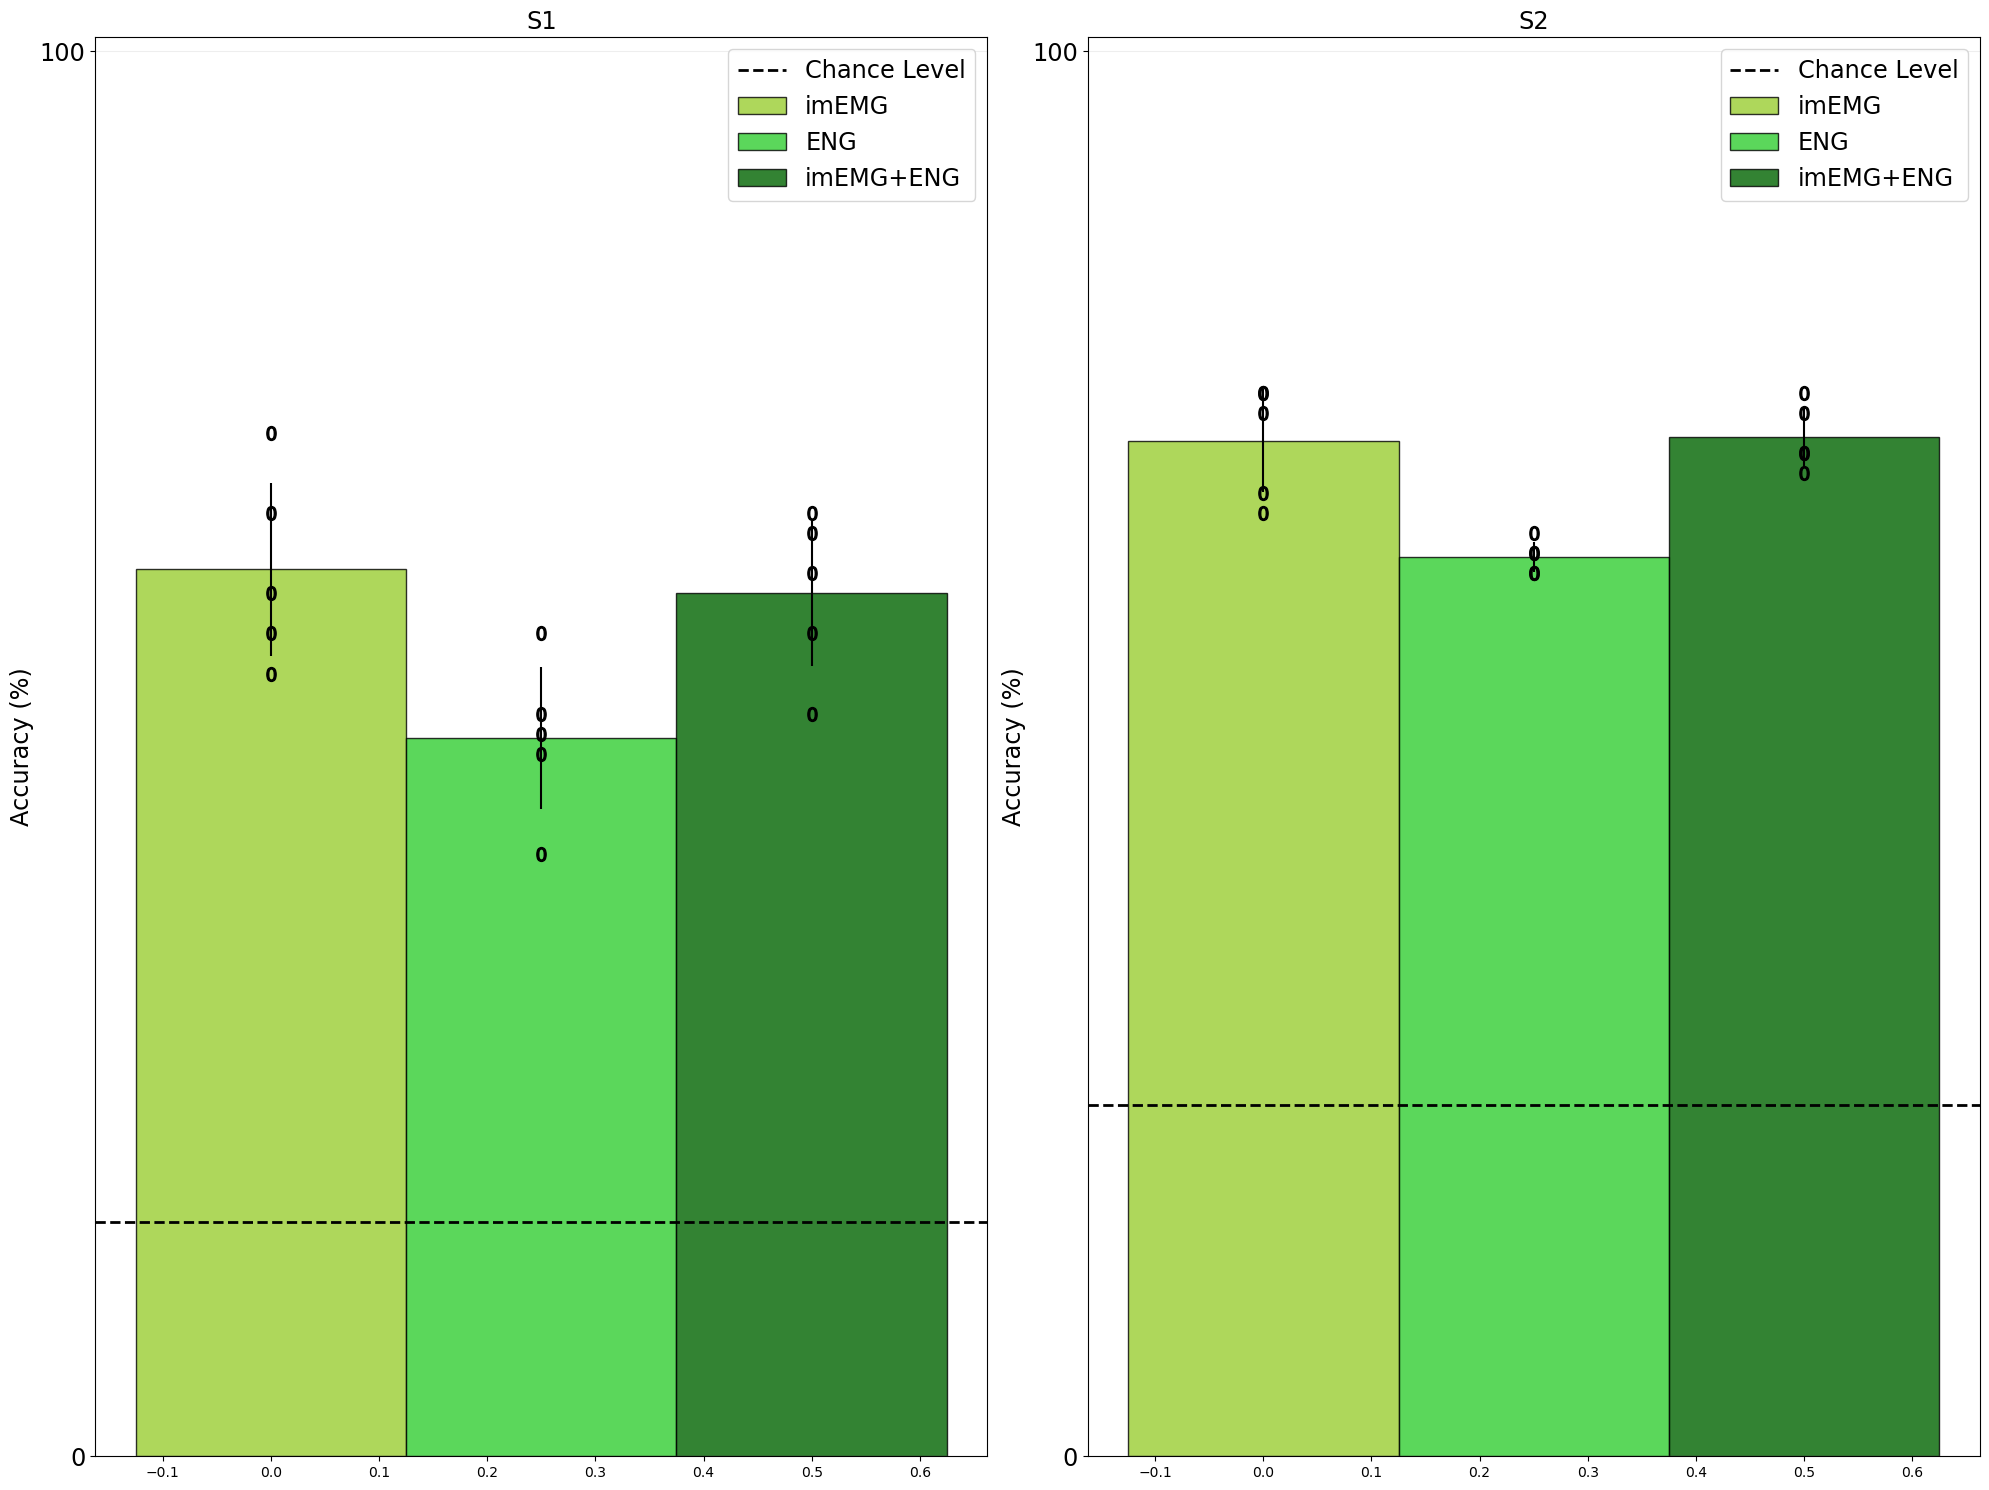

In [42]:
#FIGURE 5B
results_imEMG_S1 = extracting_array_from_excel(df, 30)
results_ENG_S1 = extracting_array_from_excel(df, 31)
results_imEMG_plus_ENG_S1 = extracting_array_from_excel(df, 32)
results_imEMG_S2 = extracting_array_from_excel(df, 34)
results_ENG_S2 = extracting_array_from_excel(df, 35)
results_imEMG_plus_ENG_S2 = extracting_array_from_excel(df, 36)

results_emg = np.array([results_imEMG_S1, results_imEMG_S2]) * 100
results_eng = np.array([results_ENG_S1, results_ENG_S2]) * 100
results_emg_plus_eng = np.array([results_imEMG_plus_ENG_S1, results_imEMG_plus_ENG_S2]) * 100


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
for i in range(2):
    index = np.arange(1) 
    bars_width = 0.25
    opacity = 0.8

    rects_emg = ax[i].bar(index, [np.mean(results_emg[i])], bars_width, yerr = [np.std(results_emg[i])], alpha = opacity, label = 'imEMG', edgecolor='black', color='yellowgreen')
    rects_eng = ax[i].bar(index+bars_width, [np.mean(results_eng[i])], bars_width, yerr = [np.std(results_eng[i])], alpha = opacity, label = 'ENG',edgecolor='black', color='limegreen')
    rects_emg_plus_eng = ax[i].bar(index+2*bars_width, [np.mean(results_emg_plus_eng[i])], bars_width, yerr = [np.std(results_emg_plus_eng[i])], alpha = opacity, label = 'imEMG+ENG',edgecolor='black', color='darkgreen')

    ax[i].scatter(index*np.ones(5), results_emg[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), results_eng[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), results_emg_plus_eng[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,100],[0,100], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    #plt.xticks(index+1/2*bars_width, ('Encoding', 'Threshold Spikes', 'Both (Enc + Thr Spikes)'), fontsize='xx-large')
    ax[i].legend(loc='upper right', fontsize='xx-large')

plt.tight_layout()
#plt.savefig('FIGURE 4B')
#plt.savefig('FIGURE 4B.svg', format='svg')
plt.show()

In [43]:
#FIGURE S3
